In [97]:
# !pip install geopy

In [7]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.cm as cm
from geopy.geocoders import Nominatim
import folium

fm.fontManager.addfont(path = "./font/NanumGothic.ttf")
matplotlib.rcParams["font.family"] = "NanumGothic"

df = pd.read_csv('./csv/202310202503인기관광지.csv')
df = df[['관광지명','분류']]
df.reset_index(drop = True)
df.index = df.index + 1

df = df.head(20)

lat = [35.18508320560674,35.18508320560674,35.18508320560674,35.242573604895234,35.2230229621505,35.228961441630425,35.23602600899806,34.80001017035544,34.84344802059021,35.23914516815352,34.74455379952913,35.007873668344594,34.96819640573361,35.150652848178645,35.257433038639135,35.23635424320494,35.187891515219725,34.751994994914845,35.47446821861268,35.20293679374634]
long = [128.8299185836252,128.8299185836252,128.8299185836252,128.701731149651,128.6937750187552,128.87254865467224,128.57684950011472,128.03868111539967,128.70301588392476,128.58368212133158,128.66322044200803,128.71179034312254,128.70505770064491,128.11787149915324,128.60660602588493,128.63946227665224,127.62426976148335,127.98297007761745,128.77118716821903,128.57653065289927]
df['위도'] = lat
df['경도'] = long
df

coordinates = df[['위도', '경도']].to_numpy()
place = df['관광지명'].to_numpy()

center_lat = df['위도'].mean()
center_long = df['경도'].mean()

m = folium.Map(location=[center_lat, center_long], zoom_start=9)

for i in range(len(coordinates)):
    lat, long = coordinates[i]
    
    # 원형 마커
    folium.CircleMarker(
        location=[lat, long],
        radius=10,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.5,
    ).add_to(m)
    
    # 마커 텍스트 (살짝 위로 띄워 표시)
    folium.Marker(
        location=[lat + 0.05, long],
        icon=folium.DivIcon(
            f'''
            <div style="
                font-size: 9px;
                color: black;
                background: white;
                width: 80px;
                white-space: nowrap;
                overflow: hidden;
                text-overflow: ellipsis;
                opacity: 0.7;
                border-radius: 4px;
                padding: 1px 2px;
                text-align: center;
                font-size:12px;
            ">
                {place[i]}
            </div>
            '''
        )
    ).add_to(m)

m

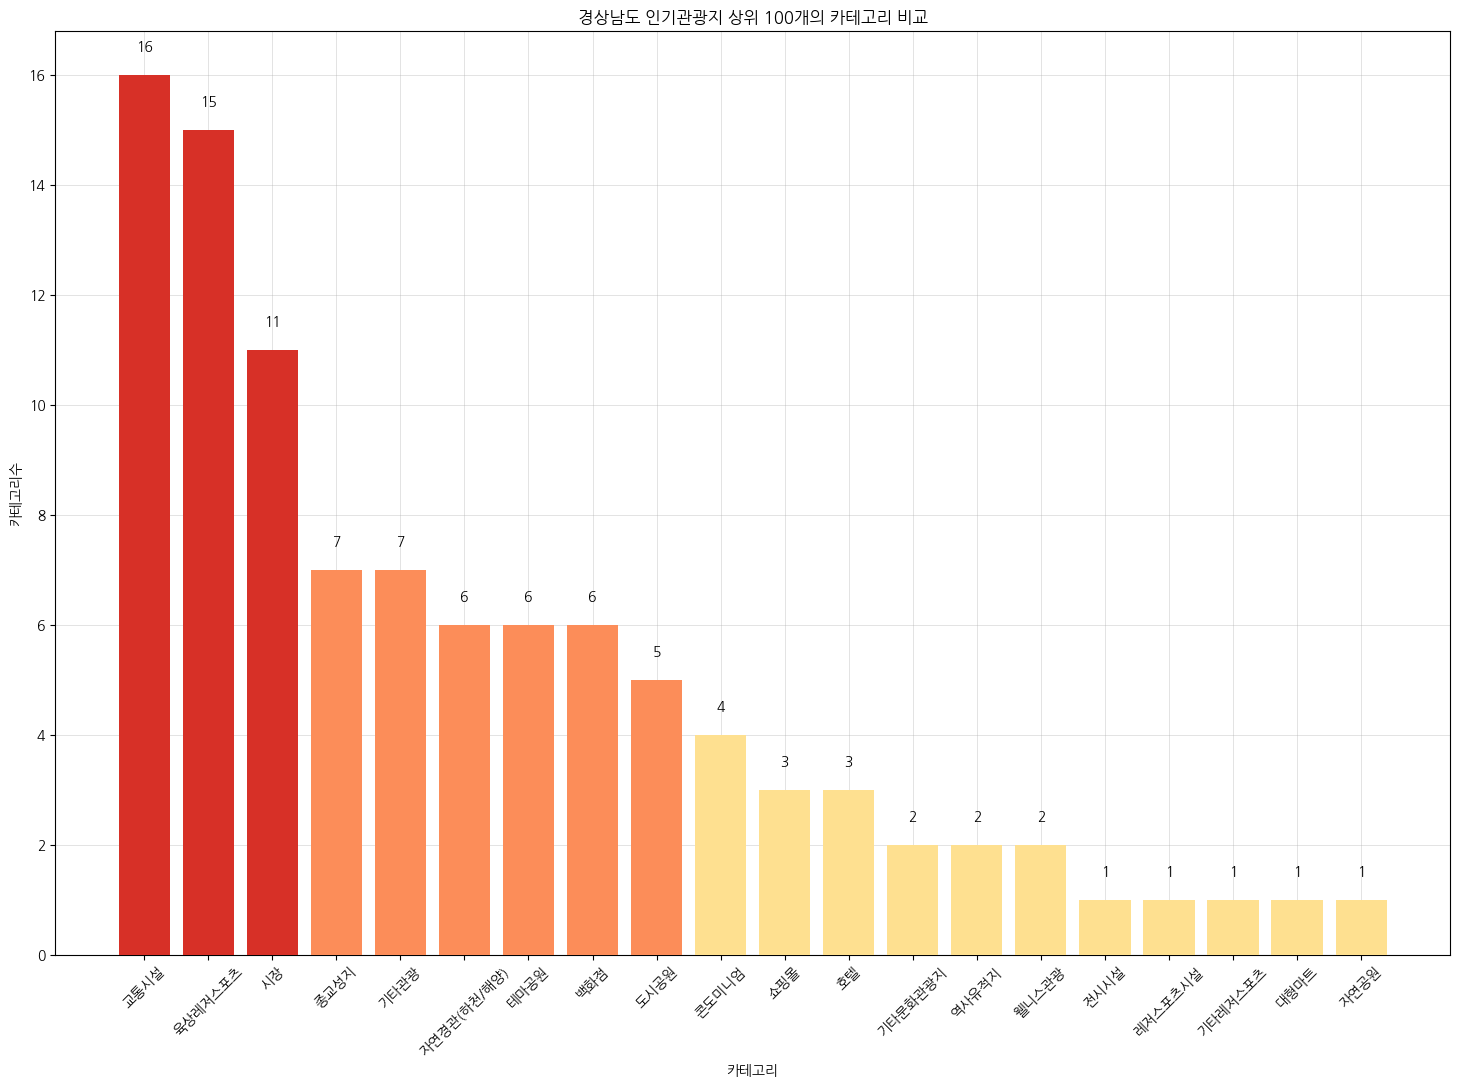

In [6]:
counter = Counter(df['분류'])
df1 = pd.DataFrame([dict(counter)])
df1 = df1.T
df1 = df1.reset_index()
df1.columns = ['카테고리','카테고리수']
df1 = df1.sort_values('카테고리수', ascending = False)
df1 = df1.reset_index()
df1

colors = ['#d73027' if v >= 10 else '#fc8d59' if v >= 5 else '#fee090' for v in df1['카테고리수']]

plt.figure(figsize = (18,12))
plt.bar(x = df1['카테고리'], height = df1['카테고리수'], zorder = 3, color = colors)

for i, value in enumerate(df1['카테고리수']):
    plt.text(i, value + 0.5, value, ha = "center", va = "center")
plt.title('경상남도 인기관광지 상위 100개의 카테고리 비교')
plt.xlabel("카테고리")
plt.xticks(rotation=45)
plt.ylabel("카테고리수")
plt.grid(True, zorder = 0, linewidth = 0.5, alpha = 0.5)
plt.savefig('./img/경상남도인기관광지카테고리.png')
plt.show()